In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

os.getcwd()

'c:\\Users\\matte\\OneDrive\\Desktop\\Università\\Trieste\\Second_year\\HPC21\\Cozzini\\MPI\\Assignment1\\Jacobi\\thin_jacobi_cores'

In [2]:
filename = 'thin_cores_4.csv'
colnames = ['Maxtime [s]', 'Mintime [s]', 'JacobiMin [s]', 'JacobiMax [s]', 'Residuals', 'MLUPs']
data_frame = pd.read_csv(filename, names=colnames, header=None)
data_frame = data_frame.round(3)
data_frame
#data_frame.mean(axis=0)
#data = data_frame.values

,Maxtime [s],Mintime [s],JacobiMin [s],JacobiMax [s],Residuals,MLUPs
0,3.865,3.865,3.768,3.779,1.202000e+07,447.092
1,3.861,3.861,3.768,3.780,2.000000e+06,447.600
2,3.860,3.860,3.768,3.779,4.259259e+05,447.642
3,3.861,3.861,3.768,3.780,1.265432e+05,447.603
4,3.860,3.860,3.768,3.779,5.182613e+04,447.628
5,3.860,3.860,3.768,3.780,2.670213e+04,447.611
6,3.860,3.860,3.768,3.779,1.589400e+04,447.633
7,3.860,3.860,3.768,3.779,1.037824e+04,447.653
8,3.860,3.860,3.768,3.779,7.222263e+03,447.628
9,3.861,3.861,3.768,3.780,5.266190e+03,447.604


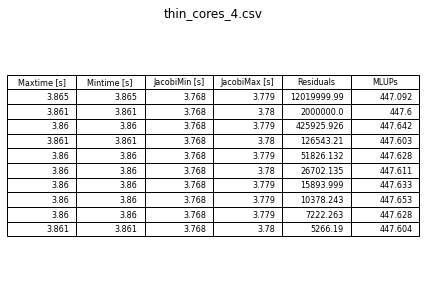

In [27]:
# creating table
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
t= ax.table(cellText=data_frame.values, colWidths = [0.2]*len(data_frame.columns),  colLabels=data_frame.columns,  loc='center')
t.auto_set_font_size(False) 
t.set_fontsize(8)
fig.tight_layout()
plt.show()

In [3]:
def get_averages(filename):
    colnames = ['Maxtime [s]', 'Mintime [s]', 'JacobiMin [s]', 'JacobiMax [s]', 'Residuals', 'MLUPs']
    data_frame = pd.read_csv(filename, names=colnames, header=None)
    averages = data_frame.mean(axis=0)
    return round(averages, 3)

In [4]:
filenames = ['thin_cores_4.csv', 'thin_cores_8.csv', 'thin_cores_12.csv']
Maxtimes = []
Mintimes = []
JacobiMin = []
JacobiMax = []
Residuals = []
MLUPs = []

for filename in filenames:
    averages = get_averages(filename)
    Maxtimes.append(averages[0])
    Mintimes.append(averages[1])
    JacobiMin.append(averages[2])
    JacobiMax.append(averages[3])
    Residuals.append(averages[4])
    MLUPs.append(averages[5])

Maxtimes = np.array(Maxtimes)
Mintimes = np.array(Mintimes)
JacobiMax = np.array(JacobiMax)
JacobiMin = np.array(JacobiMin)
Residuals = np.array(Residuals)
MLUPs = np.array(MLUPs)

In [22]:
JacobiMax

array([3.779, 1.896, 1.276])

Communication time

array([0.   , 0.082, 0.062, 0.045])

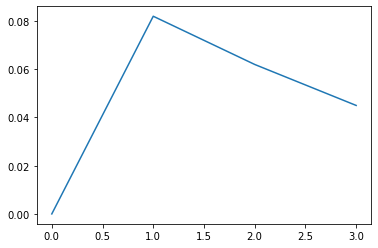

In [8]:
# Measured communication time

comm_time = np.subtract(Maxtimes, JacobiMax)

single_core_comm = 0
comm_time = np.insert(comm_time, 0, single_core_comm)
plt.plot(comm_time)
comm_time

Theoretical communication time

In [18]:
# c = L^2 * k * 2 * 8
# 4 cores: procs per dim = (2,2,1) --> k = 4
# 8           ...          (2,2,2) --> k = 6
# 12          ...          (3,2,2) --> k = 6

L = 1200
const = L**2 * 2 * 8 # bytes
c_4 = const * 4
c_8 = const * 6
c_12 = const * 6
c = np.array([0, c_4, c_8, c_12])
c = c/10**(6) # Mb

k = np.array([0,4,6,6])

latency = 0.2*10**(-6) # seconds
B = 6447.9475 # Mb/s

def theoretical_comm_time(c,B,k,latency):
    return c/B + latency*k

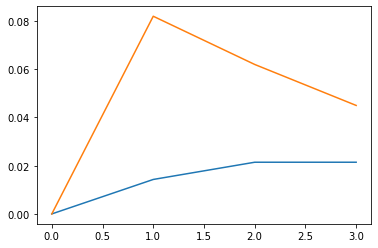

In [21]:
t = theoretical_comm_time(c,B,k,latency) # seconds
plt.plot(t)
plt.plot(comm_time)

Theoretical performance

In [24]:
single_core_jac_max = 15.067
JacobiMax = np.insert(JacobiMax, 0, single_core_jac_max)
JacobiMax #seconds

array([15.067, 15.067,  3.779,  1.896,  1.276])

In [39]:
def theoretical_perf(N, L, time, communic_time):
    L_3 = L**3/10**6
    return (L_3 * N) / 15.334 # T_s estimated via computation on single core
    

In [42]:
L = 1200 # lattice points
time = JacobiMax #seconds
c_time = theoretical_comm_time(c,B,k,latency) #seconds
N = np.array([1, 4, 8, 12])

theoretical_performance = theoretical_perf(N, L, time, c_time) # MLUP/s

measured performance : instead of theoretical comm + measured jaconi max, use the whole time as denominator

In [36]:
Maxtimes = np.insert(Maxtimes, 0, 15.334)
Maxtimes

array([15.334,  3.861,  1.958,  1.321])

In [37]:
# measured performance : instead of theoretical comm + measured jaconi max, use the whole time as denominator
def measured_perf(N, L, tot_time):
    L_3 = L**3/10**6
    return (L_3 * N) / tot_time

L = 1200 # lattice points
tot_time = Maxtimes #seconds
N = np.array([1, 4, 8, 12])

In [43]:
measured_performance = measured_perf(N,L,tot_time)

array([ 447.569,  882.644, 1308.003])

Measured performance as MLUPs given as output by program

In [44]:
MLUPs = np.insert(MLUPs, 0, 112.692)

In [45]:
MLUPs

array([ 112.692,  447.569,  882.644, 1308.003])

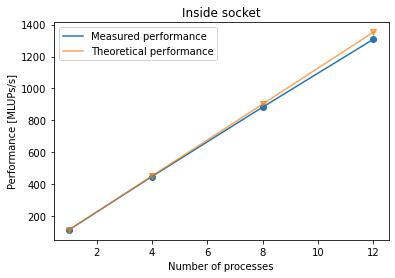

In [49]:
plt.figure()
plt.scatter(N, MLUPs)
plt.plot(N, MLUPs, label='Measured performance')
plt.scatter(N, theoretical_performance, alpha=0.7, marker='v')
plt.plot(N, theoretical_performance, label='Theoretical performance', alpha=0.7)
plt.title('Inside socket')
plt.xlabel("Number of processes")
plt.ylabel('Performance [MLUPs/s]')
plt.legend()
plt.show()

MLUPs as output of the program

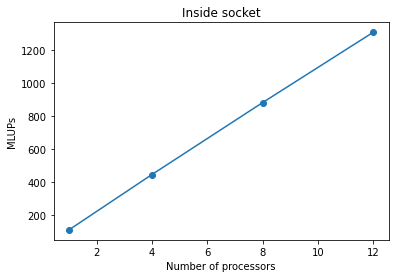

In [5]:
sc_MLUPs = 112.692

MLUPs = np.insert(MLUPs, 0, sc_MLUPs)
N = np.array([1,4,8,12])

plt.figure()
plt.scatter(N, MLUPs)
plt.plot(N,MLUPs)
plt.title('Inside socket')
plt.xlabel("Number of processors")
plt.ylabel("MLUPs")
plt.show()

Performance in MLUPs/second

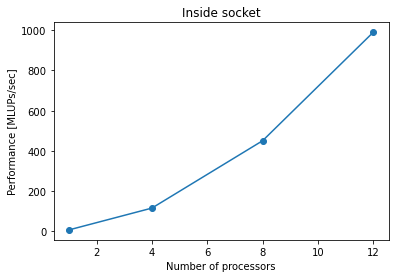

In [43]:
sc_thin_MLUPs_s = 7.349

MLUPs_second = np.divide(MLUPs, Maxtimes)
MLUPs_second = np.insert(MLUPs_second, 0, sc_thin_MLUPs_s)
N = np.array([1,4,8,12])

plt.figure()
plt.scatter(N, MLUPs_second)
plt.plot(N,MLUPs_second)
plt.title('Inside socket')
plt.xlabel("Number of processors")
plt.ylabel("Performance [MLUPs/sec]")
plt.show()

Total runtime

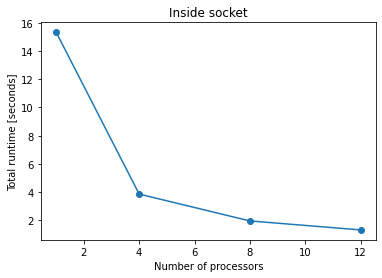

In [6]:
sc_thin_Maxtime = 15.334

Maxtimes = np.insert(Maxtimes, 0, sc_thin_Maxtime)
N = np.array([1,4,8,12])

plt.figure()
plt.scatter(N, Maxtimes)
plt.plot(N, Maxtimes)
plt.title('Inside socket')
plt.xlabel("Number of processors")
plt.ylabel("Total runtime [seconds]")
plt.show()


Speedup

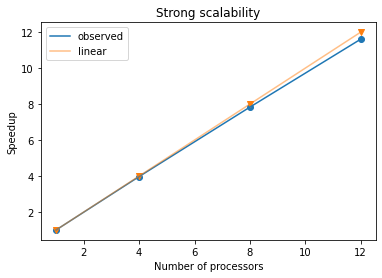

In [7]:
speedup = np.divide(Maxtimes[0], Maxtimes)
N = np.array([1,4,8,12])

plt.figure()
plt.scatter(N, speedup)
plt.plot(N, speedup, label='observed')
plt.scatter(N,N, marker="v")
plt.plot(N,N, label = 'linear', alpha=0.5)
plt.title('Strong scalability')
plt.xlabel("Number of processors")
plt.ylabel("Speedup")
plt.legend()
plt.show()

Efficiency

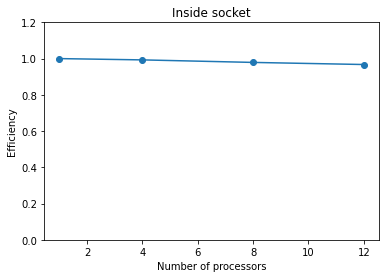

In [55]:
efficiency = np.divide(speedup, N)

plt.figure()
plt.scatter(N, efficiency)
plt.plot(N, efficiency)
plt.ylim((0,1.2))
plt.title('Inside socket')
plt.xlabel("Number of processors")
plt.ylabel("Efficiency")
plt.show()

In [72]:
L = 120

def fun(N):
    return N ** (1. / 3) * L

N = np.array([2,4,6,8,10,12,16,20,24,48,64,96])

weak_L = np.round(fun(N), 0)
weak_L

array([151., 190., 218., 240., 259., 275., 302., 326., 346., 436., 480.,
       549.])